<a href="https://colab.research.google.com/github/Dakshdureja33/Health_care_managment_ml/blob/main/HealthCare_managment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



# Data Collection and Analysis (PRE-PROCESSING)


In [ ]:
diabetes_dataset = pd.read_csv('Diabetes dataset.csv')

In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,124,97,4,0,22.224404,0.227175,21,0
1,0,142,1,3,0,42.256842,0.237995,28,1
2,10,98,86,36,3,45.583457,1.113366,38,1
3,1,95,120,0,0,22.299164,0.206287,27,0
4,6,139,63,37,134,28.597150,0.413334,27,0


In [ ]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.89100,121.334200,69.143000,20.841200,77.556600,32.089449,0.473110,33.419600,0.349400
std,3.37547,32.518924,19.660841,15.878451,110.619172,7.821086,0.332882,11.931958,0.476828
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056454,18.000000,0.000000
25%,1.00000,99.000000,63.000000,2.000000,0.000000,27.264947,0.241831,24.000000,0.000000
50%,3.00000,117.000000,72.000000,23.000000,23.000000,32.190317,0.373130,29.000000,0.000000
75%,6.00000,142.000000,80.000000,33.000000,124.000000,36.664419,0.624308,41.000000,1.000000
max,18.00000,204.000000,125.000000,101.000000,848.000000,67.986337,2.449415,82.000000,1.000000


In [ ]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               5000 non-null   int64  
 1   Glucose                   5000 non-null   int64  
 2   BloodPressure             5000 non-null   int64  
 3   SkinThickness             5000 non-null   int64  
 4   Insulin                   5000 non-null   int64  
 5   BMI                       5000 non-null   float64
 6   DiabetesPedigreeFunction  5000 non-null   float64
 7   Age                       5000 non-null   int64  
 8   Outcome                   5000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 351.7 KB


In [ ]:
diabetes_dataset.shape

(5000, 9)

In [ ]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.89100,121.334200,69.143000,20.841200,77.556600,32.089449,0.473110,33.419600,0.349400
std,3.37547,32.518924,19.660841,15.878451,110.619172,7.821086,0.332882,11.931958,0.476828
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056454,18.000000,0.000000
25%,1.00000,99.000000,63.000000,2.000000,0.000000,27.264947,0.241831,24.000000,0.000000
50%,3.00000,117.000000,72.000000,23.000000,23.000000,32.190317,0.373130,29.000000,0.000000
75%,6.00000,142.000000,80.000000,33.000000,124.000000,36.664419,0.624308,41.000000,1.000000
max,18.00000,204.000000,125.000000,101.000000,848.000000,67.986337,2.449415,82.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,3253
1,1747


0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.364587,110.386720,68.411313,19.977867,68.203812,30.382924,0.433230,31.561328
1,4.871208,141.718947,70.505438,22.448769,94.971952,35.267082,0.547369,36.879794


In [ ]:
# Separating the features and target labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0               0      124             97              4        0  22.224404   
1               0      142              1              3        0  42.256842   
2              10       98             86             36        3  45.583457   
3               1       95            120              0        0  22.299164   
4               6      139             63             37      134  28.597150   
...           ...      ...            ...            ...      ...        ...   
4995            1      117             88             27      157  33.956237   
4996            5      137             81              0        5   0.000000   
4997            6      155             87             46        3  49.270303   
4998            2       88             63             41       72  37.035129   
4999            2       91             78             19        2  22.753841   

      DiabetesPedigreeFunction  Age  
0

In [ ]:
print(Y)

0       0
1       1
2       1
3       0
4       0
       ..
4995    1
4996    0
4997    1
4998    0
4999    0
Name: Outcome, Length: 5000, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[-1.15284365  0.08198508  1.41701906 ... -1.26146556 -0.73888158
  -1.04097271]
 [-1.15284365  0.63556429 -3.46627166 ...  1.30012764 -0.70637304
  -0.45425422]
 [ 1.81000305 -0.71762934  0.85747533 ...  1.72550943  1.92356623
   0.38391505]
 ...
 [ 0.62486437  1.0353715   0.90834294 ...  2.19695484 -0.50090838
   0.2162812 ]
 [-0.56027431 -1.02517335 -0.31247974 ...  0.63241541  0.13451777
  -0.78952193]
 [-0.56027431 -0.93291014  0.45053444 ... -1.19376525  3.70090999
  -0.53807115]]


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[-1.15284365  0.08198508  1.41701906 ... -1.26146556 -0.73888158
  -1.04097271]
 [-1.15284365  0.63556429 -3.46627166 ...  1.30012764 -0.70637304
  -0.45425422]
 [ 1.81000305 -0.71762934  0.85747533 ...  1.72550943  1.92356623
   0.38391505]
 ...
 [ 0.62486437  1.0353715   0.90834294 ...  2.19695484 -0.50090838
   0.2162812 ]
 [-0.56027431 -1.02517335 -0.31247974 ...  0.63241541  0.13451777
  -0.78952193]
 [-0.56027431 -0.93291014  0.45053444 ... -1.19376525  3.70090999
  -0.53807115]]
0       0
1       1
2       1
3       0
4       0
       ..
4995    1
4996    0
4997    1
4998    0
4999    0
Name: Outcome, Length: 5000, dtype: int64


# EDA**

<ipython-input-19-0ff51d9466e9>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Diabetes', 'Diabetes'])


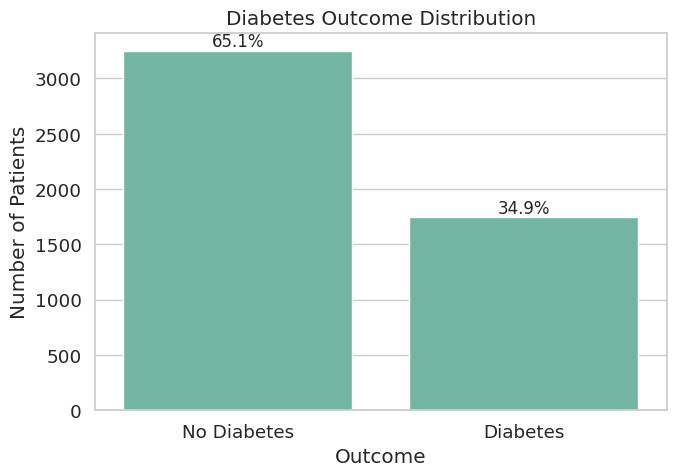

In [ ]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

plt.figure(figsize=(7, 5))
ax = sns.countplot(data=diabetes_dataset, x='Outcome')
total = len(diabetes_dataset)

for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

ax.set_xticklabels(['No Diabetes', 'Diabetes'])
plt.title('Diabetes Outcome Distribution')
plt.ylabel('Number of Patients')
plt.xlabel('Outcome')
plt.tight_layout()
plt.show()

<ipython-input-20-72abcc5344f0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Age', data=diabetes_dataset, palette='Set2')


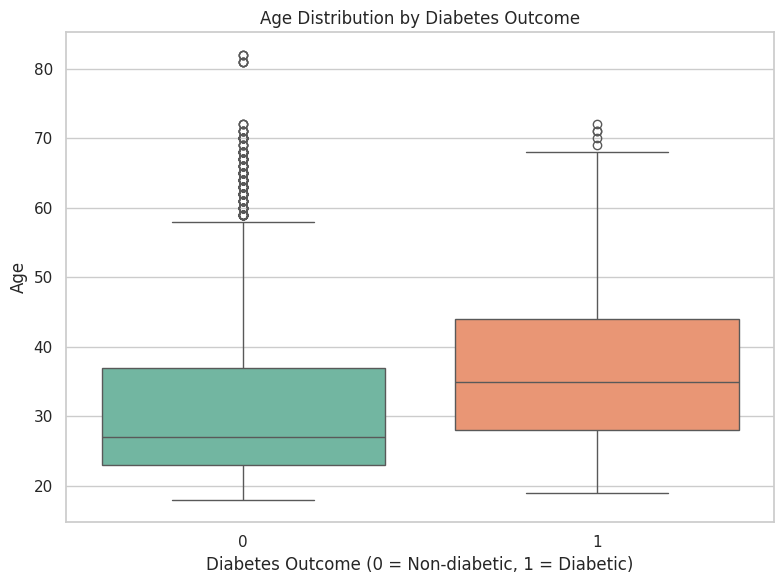


Average Age by Diabetes Outcome:
Non-diabetics (Outcome = 0): 31.56 years
Diabetics (Outcome = 1): 36.88 years

Conclusion: Age tends to be higher among diabetics.


In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Age', data=diabetes_dataset, palette='Set2')
plt.title('Age Distribution by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = Non-diabetic, 1 = Diabetic)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

mean_ages = diabetes_dataset.groupby('Outcome')['Age'].mean()
print("\nAverage Age by Diabetes Outcome:")
print(f"Non-diabetics (Outcome = 0): {mean_ages[0]:.2f} years")
print(f"Diabetics (Outcome = 1): {mean_ages[1]:.2f} years")

if mean_ages[1] > mean_ages[0]:
    conclusion = "Conclusion: Age tends to be higher among diabetics."
else:
    conclusion = "Conclusion: Age does not tend to be higher among diabetics."

print("\n" + conclusion)

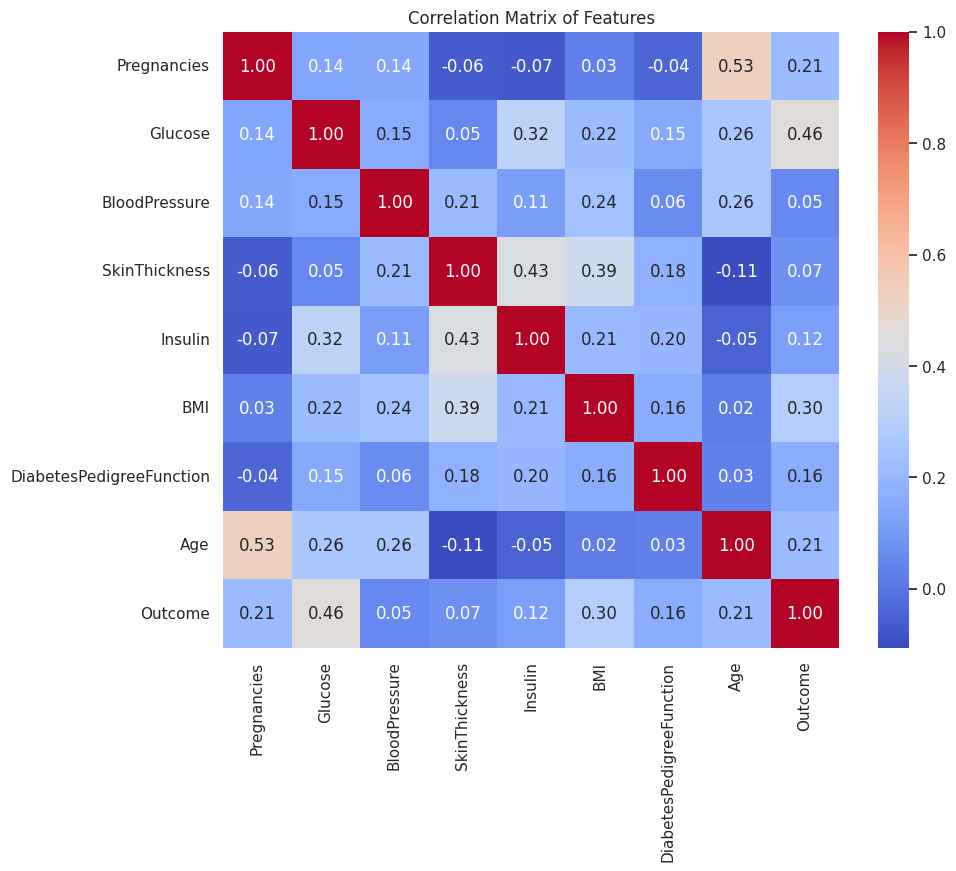

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_dataset.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Features")
plt.show()

In [ ]:
print("Statistical Summary:\n")
display(diabetes_dataset.groupby('Outcome')[['Glucose', 'BMI', 'Age']].mean().round(2))

print("\nObservations:")
print("- Diabetic individuals have notably higher average glucose and BMI.")
print("- Age tends to be higher among diabetics.")
print("- Correlation heatmap shows Glucose and BMI strongly correlate with outcome.")

Statistical Summary:



,Glucose,BMI,Age
Outcome,,,
0,110.39,30.38,31.56
1,141.72,35.27,36.88



Observations:
- Diabetic individuals have notably higher average glucose and BMI.
- Age tends to be higher among diabetics.
- Correlation heatmap shows Glucose and BMI strongly correlate with outcome.


# **Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(5000, 8) (4000, 8) (1000, 8)


Training the Model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
# Training the Support Vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [ ]:
# Accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7735


In [ ]:
# Accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.783


In [ ]:
!pip install scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, Y_train)

# Predict on training data
y_pred_log_train = log_reg.predict(X_train)
# Predict on testing data
y_pred_log_test = log_reg.predict(X_test)

print("Logistic Regression Results:")
print("Training Accuracy:", accuracy_score(Y_train, y_pred_log_train))
print("Testing Accuracy:", accuracy_score(Y_test, y_pred_log_test))
print("Classification Report (Test Data):\n", classification_report(Y_test, y_pred_log_test))


Logistic Regression Results:
Training Accuracy: 0.77275
Testing Accuracy: 0.784
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       651
           1       0.72      0.62      0.67       349

    accuracy                           0.78      1000
   macro avg       0.77      0.75      0.75      1000
weighted avg       0.78      0.78      0.78      1000



Making a Predictive System

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3285797   1.37366991  0.14532877 -0.11596749  0.8809788  -0.80424605
   0.34216694  1.47353511]]
[1]
The person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Results

In [ ]:

# Training the SVM model
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

# Making predictions for SVM
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, Y_train)

# Predict on training data
y_pred_log_train = log_reg.predict(X_train)
# Predict on testing data
y_pred_log_test = log_reg.predict(X_test)


accuracy_data = {
    'Model': ['Logistic Regression', 'Support Vector Machine (SVM)'],
    'Training Accuracy': [accuracy_score(Y_train, y_pred_log_train), training_data_accuracy],
    'Testing Accuracy': [accuracy_score(Y_test, y_pred_log_test), test_data_accuracy]
}


accuracy_table = pd.DataFrame(accuracy_data)
print(accuracy_table)

                          Model  Training Accuracy  Testing Accuracy
0           Logistic Regression            0.77275             0.784
1  Support Vector Machine (SVM)            0.77350             0.783


#Gui

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.4 MB/s eta 0:00:00


In [ ]:
import gradio as gr

def calculate_diabetes_risk(glucose, bp, bmi, insulin, outcome, age, pregnancies, skin_thickness, dpf):
    score = 0
    if glucose >= 140:
        score += 1
    if bp >= 90:
        score += 1
    if bmi >= 30:
        score += 1
    if insulin >= 150:
        score += 1
    if outcome == 1:
        score += 2
    if age >= 60:
        score += 1
    if pregnancies >= 3:
        score += 1
    if skin_thickness >= 35:
        score += 1
    if dpf >= 0.8:
        score += 1

    # Determine risk level
    if score <= 3:
        risk_level = "Low"
    elif score <= 6:
        risk_level = "Moderate"
    else:
        risk_level = "High"

    return f"Calculated Risk Score: {score} ({risk_level} Risk)"

inputs = [
    gr.Number(label="Glucose"),
    gr.Number(label="Blood Pressure"),
    gr.Number(label="BMI"),
    gr.Number(label="Insulin"),
    gr.Radio([0, 1], label="Outcome (0=No Diabetes, 1=Diabetes)"),
    gr.Number(label="Age"),
    gr.Number(label="Pregnancies"),
    gr.Number(label="Skin Thickness"),
    gr.Number(label="Diabetes Pedigree Function"),
]

output = gr.Textbox(label="Risk Assessment")

gr.Interface(fn=calculate_diabetes_risk, inputs=inputs, outputs=output, title=" Risk Calculator").launch()



It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8975927fd3614d7c5f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
